Save your .pem file in the working directory,--- 
(in our case it is C:\users\hemantkumar.wani> and name of key is EC2_key.pem which is saved in hemantkumar.wani directory.

'ec2-user' is the name user by amazon linux2 server. (we need not to do anything there)

1. we are going to create EC2 instance in AWS.
2 for creating virtual machine we are going to choose 'amazon linux2' server (free)
3. after configuring EC2 for 'AMAZON_LINUX2' open power shell in windows
4. type following commands
   - ssh
   - ssh ec2-user@18.191.159.89
   - ssh -i EC2_key.pem ec2-user@18.191.159.89
   - chmod 0400 EC2_key.pem (if access denied to .pem file or error 0644 occurs
   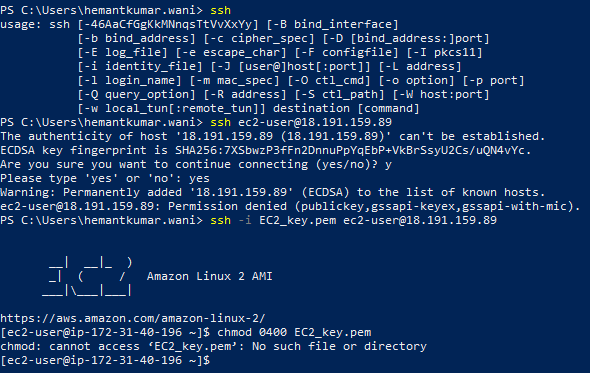


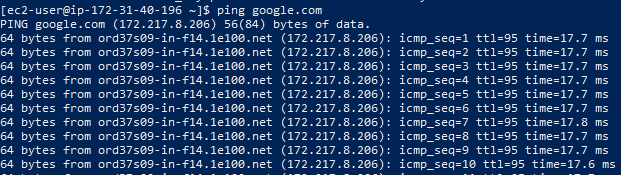


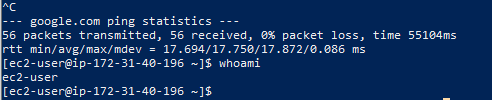

TO avoid powershell SSH key, and putty method we can directly connect using the following method.

There are many ways to connect to the VM created or EC2 created.
1. first is given above using powershell
2. using putty and putty-gen
3. click on 'connect' on EC2 dashboard, select the first tab 'EC2 Instance connect', then click 'connect at the right bottom'
 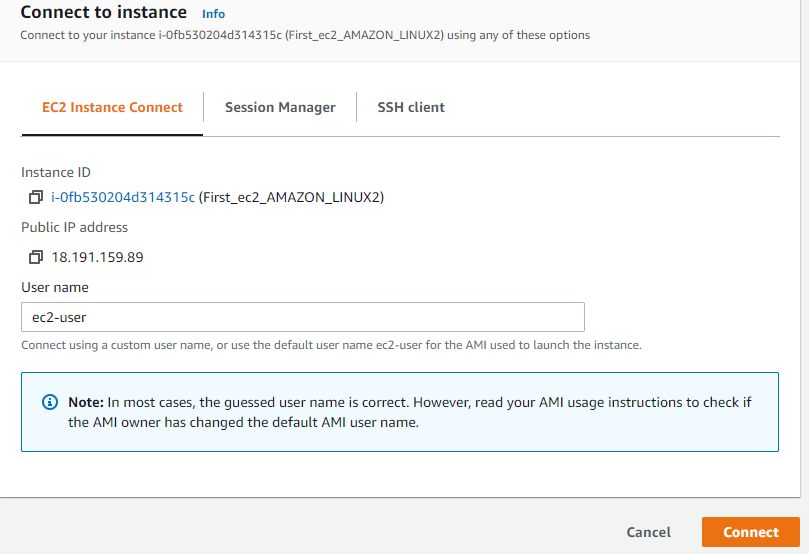

* security group is acting as a firewall for EC2 instance so we can set the privacy and access security rules.


- Lets start working on EC2 instance----------

  - Search EC2 instance in marketplace
  - configure EC2 instance
  - EC2 instance naming conventions
      - m - instance class 
      - 5 - version of an instance
      - 2xlarge - size within the instance class
      - overall it is a good balance of compute, memory and networking
      - t2 is general purpose EC2 instance (free tier)

*****************************************************************************
Once an EC2 instance is created, there are multiple ways to access it.
you can connect to EC2 through CLI (linux kernel) OR directly connect using connect option. 
*****************************************************************************

######## Usinng Linux kernel  ##########

(command prompt)

1. update system, 
   type-
   ( to become root user / or previlaged user use .......


   ~#sudo su  

   (will allow you to jump on root directory)
   (-y will autometically say yes when prompted)
  
   ~# yum update -y 
   ( will update the EC2 )

   ~# yum update -y httpd.x86_64
   ( will start updating http)

   ~# systemctl start httpd.service
   ( to start the http service)

   ~# systemctl enable httpd.service
   ( to enable the http service)

   ~# curl localhost:80
   (to check localhost serving http request or not)


   *** now check the http server (Apache 2.4) is installed or not....
   - open new explorer tab type public ip of ec2 followed by 80 i.e. port.
   (http://18.191.159.89:80)

   it will not be loaded because of inbound rules set by ec2 is SSH only, we neet to add http rule with port 80. to do so type...
   - click security group
   - select http from dropdown and select port as 80
   - save the changes.
   - again open the brwoser and type    (http://18.191.159.89:80)
***will see the test page of apache2.4 is loaded.

Amazon Elastic Compute Cloud (Amazon EC2) is a web service that provides secure, resizable compute capacity in the cloud. It is designed to make web-scale cloud computing easier for developers. Amazon EC2’s simple web service interface allows you to obtain and configure capacity with minimal friction. It provides you with complete control of your computing resources and lets you run on Amazon’s proven computing environment.

Amazon EC2 offers the broadest and deepest compute platform with choice of processor, storage, networking, operating system, and purchase model. We offer the fastest processors in the cloud and we are the only cloud with 400 Gbps ethernet networking. We have the most powerful GPU instances for machine learning training and graphics workloads, as well as the lowest cost-per-inference instances in the cloud. More SAP, HPC, Machine Learning, and Windows workloads run on AWS than any other cloud. Click here to learn What's New with Amazon EC2.

- Reliable, scalable, infrastructure on demand
  - Increase or decrease capacity within minutes, not hours or days
  - SLA commitment of 99.99% availability for each Amazon EC2 region. Each region consists of at least 3 availability zones
  - The AWS Region/AZ model has been recognized by Gartner as the recommended approach for running enterprise applications that require high availability

  
######### Creating EC2 instance with user data (to automate the above group of commands and run it in one go...)
- at the time of creation of new instance, in step 3 'Configure Instance Details', get down and click on 'Advanced Details' update the user data and save it.
- paste all group of commands as a script and save it.
- before updating teh settings, instance must be stopped.
- once the changes are updated restart the instance.
- rerun the script in chrome browwer with public ipv4 address.


There are many type of instances:
- On demand instances(Short load, prdictable pricing)
- Reserved instances (need to be created for the requirement of min 1 year) 
  - Reserved, convirtible and schedule
- SPOT instancesm
- Dedicated instances (no other customers can use it)

Notation Represents R-RAM,
                    C- CPU/ compute, 
                    M- Mdedium (balanced resources) for general purpose such as                     web development app, 
                    L- Local IO,  
                    G- GPU (deep learning/Video rendering/ Image processing) , 
                    T2/T3 - burstable instances (great performance for a short while)



######## IAM (Identity and access management) #########

Introduces you to AWS Identity and Access Management, helps you set up users and groups, and shows you how to protect your resources with access control policies. Also shows how to connect to other identity services to grant external users access to your AWS resources.
- IAM serves a purpose to give controlled permissions to different users
  (different users may have different permissions within a group)
- by default 'root' account is created which can not be shared
- to share the account across group or users, we can send a URL directly
   - to do so you can create a alias and sign in as 'sign-in-url' 
   - that URL can be shared with the users u want
   - once the receiver clicks the URL, it will land up on the sign-in page with user name (password need to be type)
   - the '@' sign in username shows IAM user, which means this user is not a root user.
   - you can add new policy or can use existing (created by AWS) to mangage users
- users are people within organization, and can be grouped
- groups only contains users not other groups
- user dont have to belong to a group, and can be a member of multiple groups

####### MFA (multi factor authorization) 

- MFA offers extra security to root user by offerring password + security device you know

- always use IAM role to create access keys and not root user
- if you use root user to create access keys you may loose your security and have to pay huge amount of money.
- to add access key-
  - select 'users' from console
  - select the respective user
  - choose third tag 'security credentials'
  - click on create access keys
  - once the key created,it will be prompted
  - you should download it as a .csv OR access your account using CLI. 
    (because it will not be prompted again) 
  - type '~# aws config'  and provide the access id and key prompted while creating it
  - IAM policies are JSON files contains permissions to users OR groups

************ if EC2 shows connection time-out, then check 'inbound rules'
in security and add SSH prtocol as a type and 22 as a port.

########## AMI (Amazon machine image) ############

- AMI is used for customization of  EC2 instance
- AMIs are build for specific region
- They can be copied across region

- An Amazon Machine Image is a special type of virtual appliance that is used to create a virtual machine within the Amazon Elastic Compute Cloud. It serves as the basic unit of deployment for services delivered using EC2.

Amazon Machine Image (AMI) provides the information required to launch an instance. You must specify an AMI when you launch an instance. You can launch multiple instances from a single AMI when you need multiple instances with the same configuration. You can use different AMIs to launch instances when you need instances with different configurations.

An AMI includes the following:

One or more Amazon Elastic Block Store (Amazon EBS) snapshots, or, for instance-store-backed AMIs, a template for the root volume of the instance (for example, an operating system, an application server, and applications).

Launch permissions that control which AWS accounts can use the AMI to launch instances.

A block device mapping that specifies the volumes to attach to the instance when it's launched.
- normal EC2 instances comes with preconfigured setup with windows, ubuntu, fedora, mac, and many more like amazon linux 2 etc.
- but we can customize our own instance and using amazon AMI
- we can rent or use other people AMI
- faster boot time, preinstalled packeges
- image comes wiht preinstalled monitoring enterprise software
- great control over networking and maintenance 

######### Create an image using AMI (Amazon Machine Image) of an existing EC2 instance

- right click on EC2 instance
- select "image and templates", then choose 'create image'
- name the image and write a description
- click create image
****** new image will be created with AMI ID and name
now we can create another instance from the image 
- right click on image instance
- click 'launch'
- follow the process to create new instance
- if we check and run the instance.. we will get 'hello world....' for the instances with different IPv4 ids...as the other one is an image of older one.

*********** We launched second instance from the AMI of first instance by creating its image************


########## Placement Groups ########### 

When you launch a new EC2 instance, the EC2 service attempts to place the instance in such a way that all of your instances are spread out across underlying hardware to minimize correlated failures. You can use placement groups to influence the placement of a group of interdependent instances to meet the needs of your workload. Depending on the type of workload, you can create a placement group using one of the following placement strategies:

- Cluster – packs instances close together inside an Availability Zone. This strategy enables workloads to achieve the low-latency network performance necessary for tightly-coupled node-to-node communication that is typical of HPC applications.

- Partition – spreads your instances across logical partitions such that groups of instances in one partition do not share the underlying hardware with groups of instances in different partitions. This strategy is typically used by large distributed and replicated workloads, such as Hadoop, Cassandra, and Kafka.

- Spread – strictly places a small group of instances across distinct underlying hardware to reduce correlated failures.

There is no charge for creating a placement group

- we can control EC2 instance by having placment strategy
- that strategy can be defined using placement groups
- There are 3 placement group strategies
  - cluster (high performace high risk- low latency, single avaialbility zone)
  - spread ( instances across underlying hardware, max 7 instances per group- critical applications)
  - partition  ( spread instances across many different partitions, within scales of 100 of racks per group, used for Hadoop, cassandra, Kafka )


  ####### using placement group #######

- slelect a placement group from main menu given in the left panel
- config it with the required settings for placement group strategy (i. e. cluster, Spread, Partition)
- now while creating an EC2 instances, in step 2- 'configure instance details'
- check the placement gropu option in left hand side
- click on it and select the type of strategy
- slelct 'add instance to placement group'
- slelct 'add an existing placement group'


cssssssssasasssssssssss--

ENI (Elastic Network Interface)
An elastic network interface is a logical networking component in a VPC that represents a virtual network card. It can include the following attributes:

A primary private IPv4 address from the IPv4 address range of your VPC

One or more secondary private IPv4 addresses from the IPv4 address range of your VPC

- One Elastic IP address (IPv4) per private IPv4 address

- One public IPv4 address

- One or more IPv6 addresses

- One or more security groups

- A MAC address

- A source/destination check flag

- A description

You can create and configure network interfaces in your account and attach them to instances in your VPC. Your account might also have requester-managed network interfaces, which are created and managed by AWS services to enable you to use other resources and services. You cannot manage these network interfaces yourself. For more information, see Requester-managed network interfaces.

This AWS resource is referred to as a network interface in the AWS Management Console and the Amazon EC2 API. Therefore, we use "network interface" in this documentation instead of "elastic network interface". The term "network interface" in this documentation always means "elastic network interface".
- Logical component in VPC that represent a virtual network card
- A primary private IPv4 address from the IPv4 address range of your VPC

- One or more secondary private IPv4 addresses from the IPv4 address range of your VPC

- One Elastic IP address (IPv4) per private IPv4 address

- One public IPv4 address

- One or more IPv6 addresses

- One or more security groups

- A MAC address

- A source/destination check flag

- A description


Scalability and Availability
 - Vertical scalability (increasing the size of instance)
 - ex-upgrading t2.micro to t3.lage 
 - Horizontal scalability ( increasing no of operators)                 
 High Availability 
 - running your application on more than 2 data centers / availability zones (AZ)
 

########## SSL (secured sockets layer)
  You can use Secure Socket Layer (SSL) or Transport Layer Security (TLS) from your application to encrypt a connection to a DB instance running MySQL, MariaDB, SQL Server, Oracle, or PostgreSQL. Each DB engine has its own process for implementing SSL/TLS. To learn how to implement SSL/TLS for your DB instance, use the link following that corresponds to your DB engine:

- Using SSL with a MariaDB DB instance

- Using SSL with a Microsoft SQL Server DB instance

- Using SSL with a MySQL DB instance

- Encrypting client connections with SSL

  Using SSL with a PostgreSQL DB instance

  - used to encrypt connections
  - SSL certificate allows traffic between your client and load balancer

########## TSL (transport Layer security - newer version of SSL)

  The FreeRTOS Transport Layer Security (TLS) interface is a thin, optional wrapper used to abstract cryptographic implementation details away from the Secure Sockets Layer (SSL) interface above it in the protocol stack. The purpose of the TLS interface is to make the current software crypto library, mbed TLS, easy to replace with an alternative implementation for TLS protocol negotiation and cryptographic primitives. The TLS interface can be swapped out without any changes required to the SSL interface. See iot_tls.h in the FreeRTOS source code repository.

The TLS interface is optional because you can choose to interface directly from SSL into a crypto library. The interface is not used for MCU solutions that include a full-stack offload implementation of TLS and network transport.
- Public SSL certificates are issued by CA (certificate authorities)
- GoDaddy, Comodo, Semantec, Globalsign, Digicert


############## Auto Scaling Groups (ASG)
An Auto Scaling group contains a collection of Amazon EC2 instances that are treated as a logical grouping for the purposes of automatic scaling and management. An Auto Scaling group also enables you to use Amazon EC2 Auto Scaling features such as health check replacements and scaling policies. Both maintaining the number of instances in an Auto Scaling group and automatic scaling are the core functionality of the Amazon EC2 Auto Scaling service.

The size of an Auto Scaling group depends on the number of instances that you set as the desired capacity. You can adjust its size to meet demand, either manually or by using automatic scaling.

An Auto Scaling group starts by launching enough instances to meet its desired capacity. It maintains this number of instances by performing periodic health checks on the instances in the group. The Auto Scaling group continues to maintain a fixed number of instances even if an instance becomes unhealthy. If an instance becomes unhealthy, the group terminates the unhealthy instance and launches another instance to replace it. For more information, see Health checks for Auto Scaling instances.

You can use scaling policies to increase or decrease the number of instances in your group dynamically to meet changing conditions. When the scaling policy is in effect, the Auto Scaling group adjusts the desired capacity of the group, between the minimum and maximum capacity values that you specify, and launches or terminates the instances as needed. You can also scale on a schedule. For more information, see Scaling the size of your Auto Scaling group.

An Auto Scaling group can launch On-Demand Instances, Spot Instances, or both. You can specify multiple purchase options for your Auto Scaling group only when you configure the group to use a launch template. (We recommend that you use launch templates instead of launch configurations to make sure that you can use the latest features of Amazon EC2.)

Spot Instances provide you with access to unused Amazon EC2 capacity at steep discounts relative to On-Demand prices. For more information, see Amazon EC2 Spot Instances. There are key differences between Spot Instances and On-Demand Instances:

  - The price for Spot Instances varies based on demand

  - Amazon EC2 can terminate an individual Spot Instance as the availability of, or price for, Spot Instances changes

  - When a Spot Instance is terminated, the Auto Scaling group attempts to launch a replacement instance to maintain the desired capacity for the group.

  - When instances are launched, if you specified multiple Availability Zones, the desired capacity is distributed across these Availability Zones. If a scaling action occurs, Amazon EC2 Auto Scaling automatically maintains balance across all of the Availability Zones that you specify.

If you're new to Auto Scaling groups, start by creating a launch template or a launch configuration and then use it to create an Auto Scaling group in which all instances have the same instance attributes. You can set the following instance attributes by specifying them as part of the launch template or launch configuration: AMI, block devices, key pair, instance type, security groups, user data, EC2 instance monitoring, instance profile, kernel, ramdisk, the tenancy of the instance, whether the instance has a public IP address, and whether the instance is EBS-optimized. The Getting started with Amazon EC2 Auto Scaling tutorial provides a quick introduction to the various building blocks that are used in Amazon EC2 Auto Scaling.
- scale out (ADD more EC2 instances) when the load is high
- scale in (reomove EC2 instances) when there is no need
- ensures minimum and maximum instances as per the load
- autometically register new instance to a load balancer


############# EBS (Elastic Block Store) volume ############

Amazon Elastic Block Store (EBS) is an easy to use, high-performance, block-storage service designed for use with Amazon Elastic Compute Cloud (EC2) for both throughput and transaction intensive workloads at any scale. A broad range of workloads, such as relational and non-relational databases, enterprise applications, containerized applications, big data analytics engines, file systems, and media workflows are widely deployed on Amazon EBS.

You can choose from six different volume types to balance optimal price and performance. You can achieve single-digit-millisecond latency for high-performance database workloads such as SAP HANA or gigabyte per second throughput for large, sequential workloads such as Hadoop. You can change volume types, tune performance, or increase volume size without disrupting your critical applications, so you have cost-effective storage when you need it.

Designed for mission-critical systems, EBS volumes are replicated within an Availability Zone (AZ) and can easily scale to petabytes of data. Also, you can use EBS Snapshots with automated lifecycle policies to back up your volumes in Amazon S3, while ensuring geographic protection of your data and business continuity.

- performance for any workload 
- highly available and durable
- cost effective

- When an EC2 instance is terminated, we loose the infomation related with it.
- similarly an unexpected termination may happen due to any reason.
- EBS volume serves to store such information that we might loose while working with EC2
- EBS is a network drive not a physical drive
- it can be attached and detached to any EC2 instance.
- there is bit of latency
- We can not connect one EBS (confiured for one AZ) to any other AZ.
  eg. We can not connect US-EAST (1A) to US-EAST (1B) Availability zone

- EBS vol are of 4 types
  - GP2 SSD (General Purpose, balance of price and performance)
  - IOI SSD (low latency, highest perpormance, used in mission critical situation
  - STI SSD (low cost, designed for frequently accessed data)
  - SCI SSD (lowest cost, designed for less frequently accessed data)
  - only GP2 and IOI can be used as a boot volume.
*** EBS can be added while creating EC2 instance in step 4- 'ADD STORAGE', drop down and select EBS volume and configure it.

###### working with EBS ###########

Amazon Elastic Block Store (EBS) is an easy to use, high-performance, block-storage service designed for use with Amazon Elastic Compute Cloud (EC2) for both throughput and transaction intensive workloads at any scale. A broad range of workloads, such as relational and non-relational databases, enterprise applications, containerized applications, big data analytics engines, file systems, and media workflows are widely deployed on Amazon EBS.

You can choose from six different volume types to balance optimal price and performance. You can achieve single-digit-millisecond latency for high-performance database workloads such as SAP HANA or gigabyte per second throughput for large, sequential workloads such as Hadoop. You can change volume types, tune performance, or increase volume size without disrupting your critical applications, so you have cost-effective storage when you need it.

Designed for mission-critical systems, EBS volumes are replicated within an Availability Zone (AZ) and can easily scale to petabytes of data. Also, you can use EBS Snapshots with automated lifecycle policies to back up your volumes in Amazon S3, while ensuring geographic protection of your data and business continuity.

- EBS volume is a netowrk drive that can be attach to an instance while they run
- EBS can hold istance data even if the instance is terminated
- they can be mounted for only one instance at a time (CCP level)
- they are bound to specific AZ
- to create EBS volume -
  - serch for elastic block storage in console menu
  - select the fourth tag 'storage' and manage the storage / create the volume as per your need (by default it is 8GB)


####### EBS with CLI or powershell  #########

- open command prompt (powershell)
- get ssh key
- type '$ lsblk' (it will show all attached drive, recently added EBS drive too)
- u will see 'xvdb' as a avaialble drive with size which is not avaialble for use as it is not mouneted yet.
- type '$ sudo file -s /dev/xvdb'   press enter (for linux)
- if u get '$ /dev/xvdb:data' , it means there is no single file on a drive
- then to create file system type '$ sudo mkfs -t ext4 /dev/xvdb'
   ** it will create ext4 type file on dev/xvdb volume
- now you need to mount it using '$ sudo mkdir/data'
- '$ sudo mount /dev/xvdb/data' 
- to check type '$ lsblk'

**** USE case for IO1 EBS

- large database workloads such as mongoDB, Casandra, MS sql, PostgresSQL ,oracle
- ranges between 4 gb to 16 TB
- maximum ratio of provisioned IOPs is 50:1




############# EBS snapshots ###############

You can back up the data on your Amazon EBS volumes to Amazon S3 by taking point-in-time snapshots. Snapshots are incremental backups, which means that only the blocks on the device that have changed after your most recent snapshot are saved. This minimizes the time required to create the snapshot and saves on storage costs by not duplicating data. Each snapshot contains all of the information that is needed to restore your data (from the moment when the snapshot was taken) to a new EBS volume.

When you create an EBS volume based on a snapshot, the new volume begins as an exact replica of the original volume that was used to create the snapshot. The replicated volume loads data in the background so that you can begin using it immediately. If you access data that hasn't been loaded yet, the volume immediately downloads the requested data from Amazon S3, and then continues loading the rest of the volume's data in the background. For more information, see Create Amazon EBS snapshots.

When you delete a snapshot, only the data unique to that snapshot is removed. For more information, see Delete an Amazon EBS snapshot.

- Snapshot events

You can track the status of your EBS snapshots through CloudWatch Events. For more information, see EBS snapshot events.

- Multi-volume snapshots

Snapshots can be used to create a backup of critical workloads, such as a large database or a file system that spans across multiple EBS volumes. Multi-volume snapshots allow you to take exact point-in-time, data coordinated, and crash-consistent snapshots across multiple EBS volumes attached to an EC2 instance. You are no longer required to stop your instance or to coordinate between volumes to ensure crash consistency, because snapshots are automatically taken across multiple EBS volumes. For more information, see the steps for creating a multi-volume EBS snapshot under Create Amazon EBS snapshots .

- Snapshot pricing

Charges for your snapshots are based on the amount of data stored. Because snapshots are incremental, deleting a snapshot might not reduce your data storage costs. Data referenced exclusively by a snapshot is removed when that snapshot is deleted, but data referenced by other snapshots is preserved. For more information, see Amazon Elastic Block Store Volumes and Snapshots in the AWS Billing and Cost Management User Guide.
- It is incremental backup of changed blocks
- EBS backups uses IOs and we should not run them while our application is handling lot of traffic
- snapshots are stored in S3 (but we are not able to see it direcctly)
- can copy snapshots across  AZ or region
- snapshots can be automated using amazon data lifecycle manager


########## Creating snapshots  ##############

- go to EC2 dashboard
- search fo volumes
- select appropriate volume size
- then select a EBS from the avaialble list of EBSs (created earlier while creating EC2 instance step 4 'add storage'
- then right click on EBS we want to use, and click on 'create snapshot'
- we can also create snapshot lifecycle policy by clicking 'Data lifecycle manger' present below 'snapshots'
- instance store is physically attached to your machine (EBS is network drive)


  - With Amazon EBS, you can use any of the standard RAID configurations that you can use with a traditional bare metal server, as long as that particular RAID configuration is supported by the operating system for your instance. This is because all RAID is accomplished at the software level. For greater I/O performance than you can achieve with a single volume, RAID 0 can stripe multiple volumes together; for on-instance redundancy, RAID 1 can mirror two volumes together.

RAID (redundant array of inexpensive disks) 
  RAID0- When I/O performance is more important than fault tolerance; for example, as in a heavily used database (where data replication is already set up separately)

  RAID1-When fault tolerance is more important than I/O performance; for example, as in a critical application.

  RAID5 and RAID6 are not used in EBS

  

########## EC2 instance store ##########


- EBS volume are network drives with good but limited performace
- if we need high performance, we shall use EC2 instance store
- good fpr buffer /cache/ scratch data/ temporary content
- risk of loosing data if hardware crash


############ EFS (Elastic File System) ##############

Amazon Elastic File System (Amazon EFS) provides a simple, serverless, set-and-forget, elastic file system that lets you share file data without provisioning or managing storage. It can be used with AWS Cloud services and on-premises resources, and is built to scale on demand to petabytes without disrupting applications. With Amazon EFS, you can grow and shrink your file systems automatically as you add and remove files, eliminating the need to provision and manage capacity to accommodate growth.
Amazon EFS offers you the choice of creating file systems using Standard or One Zone storage classes. Standard storage classes store data within and across multiple availability zones (AZ). One Zone storage classes store data redundantly within a single AZ, at a 47% lower price compared to file systems using Standard storage classes, for workloads that don’t require multi-AZ resilience.

Amazon EFS offers four storage classes: two Standard storage classes, Amazon EFS Standard and Amazon EFS Standard-Infrequent Access (EFS Standard-IA), and two One Zone storage classes, Amazon EFS One Zone, and Amazon EFS One Zone-Infrequent Access (EFS One Zone-IA).

While workload patterns vary, customers typically find that 80% of files are infrequently accessed (and suitable for infrequent access storage classes), and 20% are actively used (suitable for EFS Standard and EFS One Zone storage classes), resulting in an effective storage cost as low as $0.043/GB-month1 for file systems with One Zone storage classes, and $0.08/GB-month2 for file systems with Standard storage classes. Amazon EFS transparently serves files from both frequently accessed and infrequent accessed storage classes in a common file system namespace.

Amazon EFS is designed to provide massively parallel shared access to thousands of Amazon EC2 instances, and AWS containers and serverless compute services including Amazon Elastic Container Service (ECS), Amazon Elastic Kubernetes Service (EKS), AWS Fargate, and AWS Lambda, enabling your applications to achieve high levels of aggregate throughput and IOPS with consistent low latencies.

- It is managed network file system
- it can be mounted on many EC2 instances
- It can be mapped with multiple AZ as well
- highly available, scalable, expensive (3 * GP2), pay per use

** USE case
- content management
- web serving 
- data sharing
- wordpress websites

  - uses NFSv4.1 protocol
  - uses security group to control access to EFS
  - compatible with linux base AMI (not with windows)
  - pay per use (No capacity planning)
  - allows 1000 + concurrant NFS client (scalability)
  - can grow to peta-byte scale network file autometically
  


########### Amazon RDS (Relational Database Services) ###########

Amazon Relational Database Service (Amazon RDS) makes it easy to set up, operate, and scale a relational database in the cloud. It provides cost-efficient and resizable capacity while automating time-consuming administration tasks such as hardware provisioning, database setup, patching and backups. It frees you to focus on your applications so you can give them the fast performance, high availability, security and compatibility they need.

Amazon RDS is available on several database instance types - optimized for memory, performance or I/O - and provides you with six familiar database engines to choose from, including Amazon Aurora, PostgreSQL, MySQL, MariaDB, Oracle Database, and SQL Server. You can use the AWS Database Migration Service to easily migrate or replicate your existing databases to Amazon RDS.

- Its mangaged DB and used database SQL as language
- It allows to create DB in the cloud which is manged by AWS
  - POstgres
  - MariaDB
  - MySQL
  - Oracle
  - Microsoft SQLserver
  - AWS Aurora (AWS propriotary service)

- Automated backups
  - Daily full backup (during the maintanance window)
  - transaction logs are backedup by RDS every 5 minutes
  - 7 days retention

- DB snapshots
  - manually triggered by the user
  - retention of backup for as long as we want

- Getting started with RDS
  - search RDS in maketplace
  - click RDS
  - configure it for free tier
      - download SQLELECTRON from google to perform some basic experiment
      - click on GUI option
      - download 'windows compatible .7z or .zip file and install it'
      - copy an endpoint (url given in RDS instance 'connect' option)
      - paste this url endpoint in SQLELECTRON
      - give the password and username when asked which is set at the time of creation of RDS instance
      - connect to a database created by us
      - start quering the DB using SQL queries

######### RDS Encryption ###########

- RDS uses AWS-KMS (key management services) -AES 256 encryption
- Encryption has to be defined at launch time
- if the master is not encrypted then replicas cant be encrypted
- we can useTransperant data encryption (TDE) for oracle and SQL server
- In-flight encryption provides SSL option with trust certificate when conntecting to DB
- snapshots of un-encrypted RDS is also un-encrypted
- snaptshot of encrypted RDS is always encrypted
- we can copy a snapshot of unencrypted RDS to encrypted one
- to do so, copy the snapshot and enable the encryption for that snapshot
- then restore the DB from encrypted snapshot
- migrate the DB to new one and delete the old DB


########## AMAZON Aurora #########

Amazon Aurora is a MySQL and PostgreSQL-compatible relational database built for the cloud, that combines the performance and availability of traditional enterprise databases with the simplicity and cost-effectiveness of open source databases.

Amazon Aurora is up to five times faster than standard MySQL databases and three times faster than standard PostgreSQL databases. It provides the security, availability, and reliability of commercial databases at 1/10th the cost. Amazon Aurora is fully managed by Amazon Relational Database Service (RDS), which automates time-consuming administration tasks like hardware provisioning, database setup, patching, and backups.

Amazon Aurora features a distributed, fault-tolerant, self-healing storage system that auto-scales up to 128TB per database instance. It delivers high performance and availability with up to 15 low-latency read replicas, point-in-time recovery, continuous backup to Amazon S3, and replication across three Availability Zones (AZs).

Visit the Amazon RDS Management Console to create your first Aurora database instance and start migrating your MySQL and PostgreSQL databases.

- Aurora is propriotary technology by AWS
- its a paid service
- Postgres and mySQL are supported by Aurora DB
- Aurora is 'AWS cloud optimized' which increase its performance  5x over mySQL on RDS and 3x on Postgres on RDS
- Aurora storage autometically increase by 10 GB, when needed upto 64TB
- Aurora can have 15 replicas while mySQL has only, yet it is faster than mySQL


####### Aurora Serverless
  - Aurora serverless is an automated DB instantiation and autoscaling based on actual usage
  - pay-per-second maked it more cost efficient
  - no capacity planning needed
  - good for unplanned workloads
######## Global Aurora
  - useful for disaster recovery
  - creates cross region replicas
  - simple to put in place
######## Working with Aurora
  - search for RDS in marketplace
  - choose AWS aurora from the avaialble list of RDS DBs 'engine options'
  - configure as per our requirement

######## AWS ElastiCache #############

Amazon ElastiCache allows you to seamlessly set up, run, and scale popular open-source compatible in-memory data stores in the cloud. Build data-intensive apps or boost the performance of your existing databases by retrieving data from high throughput and low latency in-memory data stores. Amazon ElastiCache is a popular choice for real-time use cases like Caching, Session Stores, Gaming, Geospatial Services, Real-Time Analytics, and Queuing.

Amazon ElastiCache offers fully managed Redis, voted the most loved database by developers in the Stack Overflow 2020 Developer Survey, and Memcached for your most demanding applications that require sub-millisecond response times.

- As RDS is used to manage relational databases,
- Elasticache is used to manage Redis or Memecached
- Caching is in-memory database with high performance and low latency
- helps to reduce database loads off to read intensive workloads
- REDIS is in-memory (RAM) database caching application
- application queries to elasticCache, if not available then get it from RDS and store it in ElasticCache (is called as Lazy Loading)
- Cache must have invalidation strategy so that the most recent / frequent data is available in Cache


########## Route 53 ############

Amazon Route 53 is a highly available and scalable cloud Domain Name System (DNS) web service. It is designed to give developers and businesses an extremely reliable and cost effective way to route end users to Internet applications by translating names like www.example.com into the numeric IP addresses like 192.0.2.1 that computers use to connect to each other. Amazon Route 53 is fully compliant with IPv6 as well.

Amazon Route 53 effectively connects user requests to infrastructure running in AWS – such as Amazon EC2 instances, Elastic Load Balancing load balancers, or Amazon S3 buckets – and can also be used to route users to infrastructure outside of AWS. You can use Amazon Route 53 to configure DNS health checks to route traffic to healthy endpoints or to independently monitor the health of your application and its endpoints. Amazon Route 53 Traffic Flow makes it easy for you to manage traffic globally through a variety of routing types, including Latency Based Routing, Geo DNS, Geoproximity, and Weighted Round Robin—all of which can be combined with DNS Failover in order to enable a variety of low-latency, fault-tolerant architectures. Using Amazon Route 53 Traffic Flow’s simple visual editor, you can easily manage how your end-users are routed to your application’s endpoints—whether in a single AWS region or distributed around the globe. Amazon Route 53 also offers Domain Name Registration – you can purchase and manage domain names such as example.com and Amazon Route 53 will automatically configure DNS settings for your domains.

- Route 53 is managed DNS (Domain Name System)
- DNS is collection of rules and records for clients to reach out to the servers through domain name




######## Amazon S3 (Simple storage service)  Bucket ##########

Amazon Simple Storage Service (Amazon S3) is an object storage service that offers industry-leading scalability, data availability, security, and performance. This means customers of all sizes and industries can use it to store and protect any amount of data for a range of use cases, such as data lakes, websites, mobile applications, backup and restore, archive, enterprise applications, IoT devices, and big data analytics. Amazon S3 provides easy-to-use management features so you can organize your data and configure finely-tuned access controls to meet your specific business, organizational, and compliance requirements. Amazon S3 is designed for 99.999999999% (11 9's) of durability, and stores data for millions of applications for companies all around the world.

- Physical storage offered by AWS, where we can store objects (files) such as data (input, output), images, and all logs related with an instance.
- object name must be globally unique, which must start with lowercase letter of number
- S3 can be integrated with any other service, where data needs to be stored.
- S3 objects can be encrypted (security encryption key) 
- there are three techniques to encrypt the S3 object
  - SSE-S3 ( encrypts S3 objects using keys handled by AWS)
  - SSE-KMS ( leverage AWS Key Management Service for encryption)
  - SSE-C ( when we want to manage our own encryption key for CLIENT side encryption) Any ARN (Amazon Resource Name) key stored by us.
- ACL (Access Control List) allows you to define object level read and writes

#########  CORS (cross origin resource sharing ) ########

Amazon Simple Storage Service (Amazon S3) is an object storage service that offers industry-leading scalability, data availability, security, and performance. This means customers of all sizes and industries can use it to store and protect any amount of data for a range of use cases, such as data lakes, websites, mobile applications, backup and restore, archive, enterprise applications, IoT devices, and big data analytics. Amazon S3 provides easy-to-use management features so you can organize your data and configure finely-tuned access controls to meet your specific business, organizational, and compliance requirements. Amazon S3 is designed for 99.999999999% (11 9's) of durability, and stores data for millions of applications for companies all around the world.

 - Example 1

Suppose that you are hosting a website in an Amazon S3 bucket named website as described in Hosting a static website using Amazon S3. Your users load the website endpoint:

http://website.s3-website.us-east-1.amazonaws.com
Now you want to use JavaScript on the webpages that are stored in this bucket to be able to make authenticated GET and PUT requests against the same bucket by using the Amazon S3 API endpoint for the bucket, website.s3.us-east-1.amazonaws.com. A browser would normally block JavaScript from allowing those requests, but with CORS you can configure your bucket to explicitly enable cross-origin requests from website.s3-website.us-east-1.amazonaws.com.

  - Example 2

Suppose that you want to host a web font from your S3 bucket. Again, browsers require a CORS check (also called a preflight check) for loading web fonts. You would configure the bucket that is hosting the web font to allow any origin to make these requests.
- origin is a scheme (protocol), host (Domain) and port
- The request's Origin header must match an AllowedOrigin element.

- The request method (for example, GET or PUT) or the Access-Control-Request-Method header in case of a preflight OPTIONS request must be one of the AllowedMethod elements.

- Every header listed in the request's Access-Control-Request-Headers header on the preflight request must match an AllowedHeader element.



